In [1]:
# HIDDEN
# For Tables reference see http://data8.org/datascience/tables.html
# This useful nonsense should just go at the top of your notebook.
from datascience import *
%matplotlib inline
#%matplotlib notebook
import matplotlib.pyplot as plots
import numpy as np
plots.style.use('fivethirtyeight')
plots.rc('lines', linewidth=2, color='r')
from ipywidgets import interact
# datascience version number of last run of this notebook
version.__version__

'0.15.0'

In [9]:
# The following is a bunch of code to make data presentation simple.  Skip it for reading.
import sys
sys.path.append("..")
from timetable import TimeTable

import locale
locale.setlocale( locale.LC_ALL, 'en_US.UTF-8' ) 

import power
import datetime

def view_days(view, start, end):
    date = datetime.datetime.strptime(start,"%Y-%m-%d")
    enddate = datetime.datetime.strptime(end,"%Y-%m-%d")
    while date != enddate :
        day = datetime.datetime.strftime(date, "%Y-%m-%d")
        ts, md = view.getday(day)
        p_5 = np.percentile(ts['kW'], 5)
        p_ave = np.mean(ts['kW'])
        p_95 = np.percentile(ts['kW'], 95)
        params, perr = power.loadfit(ts, p_lo = p_5, p_hi = p_95)
        ts['model'] = ts.apply(power.loadmodel(*params), 'hour')
        ts.plot('hour')
        plots.title(day)
        #print(day, p_ave, params, perr)
        date =  date + datetime.timedelta(days=1)

In [3]:
# Building of study for entire notebook
building = 'Barrows Hall'

In [4]:
ucb = power.CampusPower('https://campus-export.xbos.io')
v = ucb.view(building, 'Building_Power_Demand_Sensor')

In [13]:
# Fetch days ands build models
bldg = v.model_days("2020-02-01", "2020-03-16")

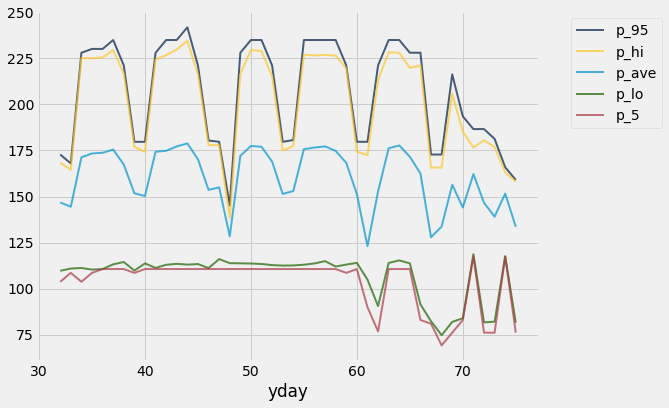

In [14]:
bldg.select(['yday', 'p_95', 'p_hi', 'p_ave',  'p_lo', 'p_5']).plot('yday', width=8, height=6)

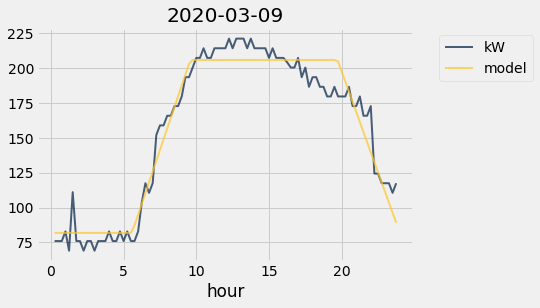

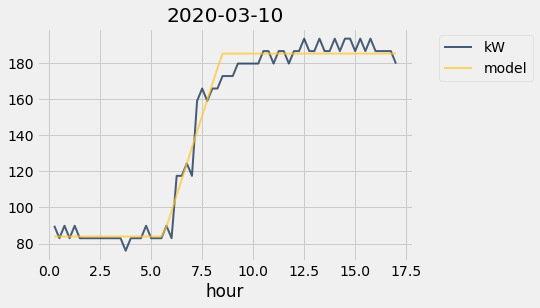

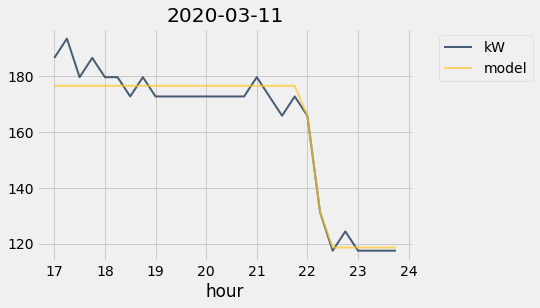

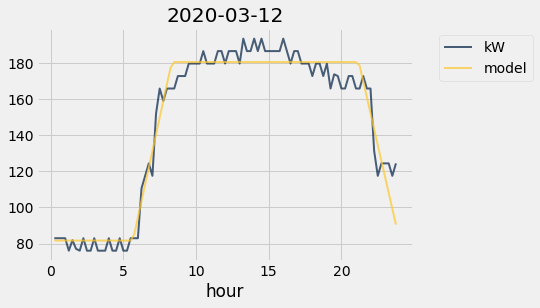

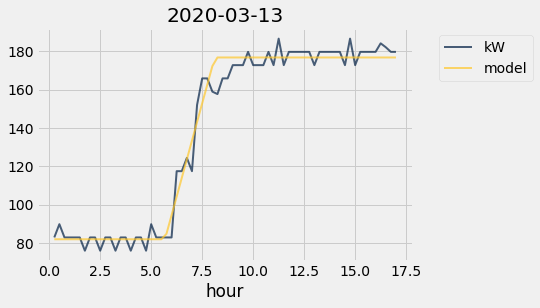

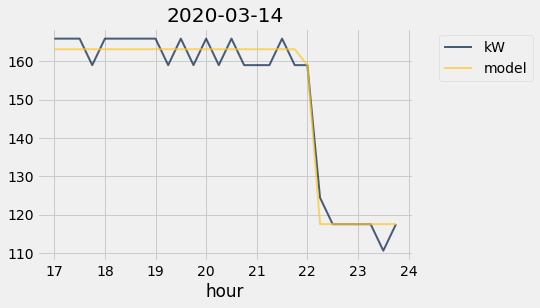

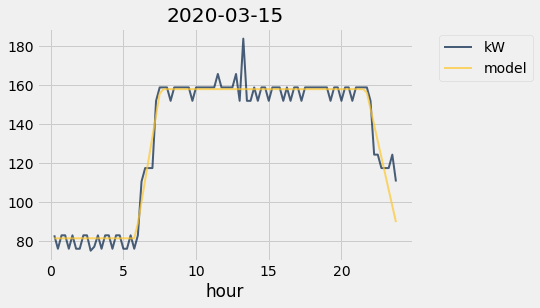

In [15]:
view_days(v, "2020-03-09", "2020-03-16")

In [19]:
ts, md = v.getday("2020-03-10")

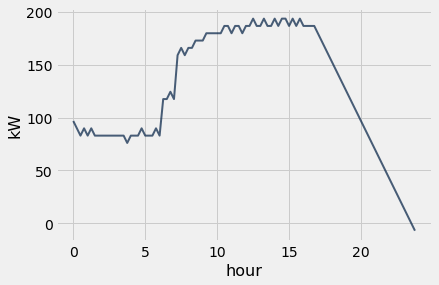

In [25]:
ts.snap(np.arange(0, 24, 0.25), 'kW').plot('hour')